In [1]:
from IPython.display import display, HTML
import re
import json

def show_result(loaded_json):
    for y in loaded_json:
        print('Request : ' + str(y['rep'] ) + '\nquery : ' + str(y['query']) )
        
        if y['oov']:
            print('# Dont know that word TT')

        if y['result_exist'] == False:
            print('# Cannot find similar meme TT (default min_sim=0.10)')

        if not y['result_exist'] or y['oov']:
            continue

        for filename in y['memes']:
            decoded = y['memes'][filename].replace("'", '"')
            decoded = re.search(r'\"(.*)\"', decoded).group(1)
            display(HTML('''<img src="data:image/jpg;base64,''' + decoded + '''">'''))    
            print(y['episodes'][filename])                
            print(y['texts'][filename])
            if y['sims']:
                print(y['sims'][filename])
        print("--- done ---\n")

Request : random
query : None



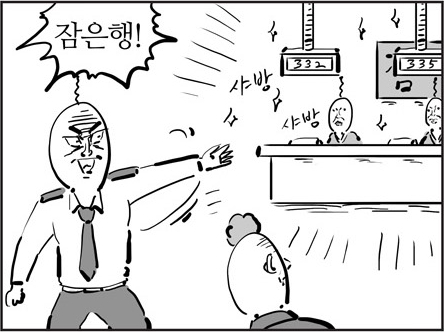

94화_잠은행上
잠은행 샤방 사 바 
--- done ---

Request : dank
query : 감사



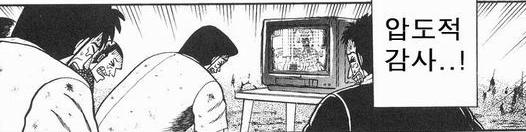

Kaizi
압도적 감사 
0.8076580762863159
--- done ---

Request : dank
query : 잠



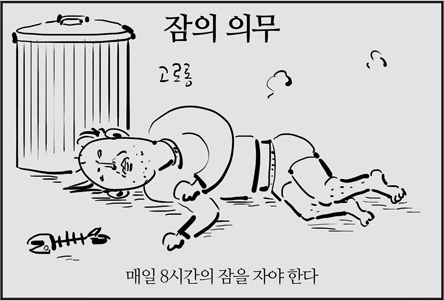

94화_잠은행上
자의 의무 매일 시간의 잠을 자야 한다 
0.18309788405895233
--- done ---



In [18]:
import client
mc = client.MgClient()

show_result(mc.random())
query = '감사'
show_result(mc.dank([query , '잠'], max_img=3, min_sim=0.15) )